In [114]:
!pip install snowflake-connector-python pandas

In [115]:
import snowflake.connector

In [116]:
conn = snowflake.connector.connect(
    user='ABDELRAHMAN1ZAID1',
    password='!6z:8MUULDpAXi!',
    account='DRTSSDW-CB27875',  # e.g. 'xy12345.east-us-2.azure'
    warehouse='COMPUTE_WH',
    database='FOREX_RATES',
    schema='PUBLIC'
)

In [117]:
import pandas as pd

In [118]:
query = "SHOW TABLES"
tables_df = pd.read_sql(query, conn)
print(tables_df[['name', 'database_name', 'schema_name']])

<ipython-input-118-a7524815dca7>:2: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



                  name          database_name  schema_name
0        FOREX_EUR_EGP             FOREX_DATA       BRONZE
1        FOREX_EUR_USD             FOREX_DATA       BRONZE
2        FOREX_USD_EGP             FOREX_DATA       BRONZE
3         DIM_CALENDAR             FOREX_DATA         GOLD
4   DIM_CURRENCY_PAIRS             FOREX_DATA         GOLD
..                 ...                    ...          ...
89              ORDERS  SNOWFLAKE_SAMPLE_DATA  TPCH_SF1000
90                PART  SNOWFLAKE_SAMPLE_DATA  TPCH_SF1000
91            PARTSUPP  SNOWFLAKE_SAMPLE_DATA  TPCH_SF1000
92              REGION  SNOWFLAKE_SAMPLE_DATA  TPCH_SF1000
93            SUPPLIER  SNOWFLAKE_SAMPLE_DATA  TPCH_SF1000

[94 rows x 3 columns]


In [119]:
import pandas as pd

# Example: loading "FOREX_EUR_USD" from the "FOREX_DATA" database and "BRONZE" schema
query = "SELECT * FROM FOREX_DATA.SILVER.FOREX_RATES"
df = pd.read_sql(query, conn)


# Preview the data
print(df.head())


<ipython-input-119-c92e770519d2>:5: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



         DATE CURRENCY_PAIR  OPEN_RATE  HIGH_RATE  LOW_RATE  CLOSE_RATE  \
0  2025-04-11       EUR/USD    1.11918    1.14736   1.11918     1.13580   
1  2025-04-10       EUR/USD    1.09497    1.12414   1.09426     1.11888   
2  2025-04-09       EUR/USD    1.09564    1.10952   1.09130     1.09503   
3  2025-04-08       EUR/USD    1.09112    1.09918   1.08881     1.09565   
4  2025-04-07       EUR/USD    1.09148    1.10500   1.09007     1.09112   

              INSERTED_AT  
0 2025-04-13 09:35:55.296  
1 2025-04-13 09:35:55.296  
2 2025-04-13 09:35:55.296  
3 2025-04-13 09:35:55.296  
4 2025-04-13 09:35:55.296  


In [120]:
df

,DATE,CURRENCY_PAIR,OPEN_RATE,HIGH_RATE,LOW_RATE,CLOSE_RATE,INSERTED_AT
0,2025-04-11,EUR/USD,1.11918,1.14736,1.11918,1.13580,2025-04-13 09:35:55.296
1,2025-04-10,EUR/USD,1.09497,1.12414,1.09426,1.11888,2025-04-13 09:35:55.296
2,2025-04-09,EUR/USD,1.09564,1.10952,1.09130,1.09503,2025-04-13 09:35:55.296
3,2025-04-08,EUR/USD,1.09112,1.09918,1.08881,1.09565,2025-04-13 09:35:55.296
4,2025-04-07,EUR/USD,1.09148,1.10500,1.09007,1.09112,2025-04-13 09:35:55.296
...,...,...,...,...,...,...,...
10401,2014-11-13,USD/EGP,7.15000,7.15000,7.13000,7.15000,2025-04-13 09:36:00.110
10402,2014-11-11,USD/EGP,7.15000,7.15000,7.15000,7.15000,2025-04-13 09:36:00.110
10403,2016-02-16,USD/EGP,7.79000,7.83000,7.79000,7.83000,2025-04-13 09:36:00.110
10404,2015-10-19,USD/EGP,7.93000,8.00000,7.93000,8.00000,2025-04-13 09:36:00.110


In [121]:
df = df.rename(columns={'OPEN_RATE': 'Open', 'HIGH_RATE': 'High','LOW_RATE':'Low','CLOSE_RATE':'Close'})

In [122]:
df

,DATE,CURRENCY_PAIR,Open,High,Low,Close,INSERTED_AT
0,2025-04-11,EUR/USD,1.11918,1.14736,1.11918,1.13580,2025-04-13 09:35:55.296
1,2025-04-10,EUR/USD,1.09497,1.12414,1.09426,1.11888,2025-04-13 09:35:55.296
2,2025-04-09,EUR/USD,1.09564,1.10952,1.09130,1.09503,2025-04-13 09:35:55.296
3,2025-04-08,EUR/USD,1.09112,1.09918,1.08881,1.09565,2025-04-13 09:35:55.296
4,2025-04-07,EUR/USD,1.09148,1.10500,1.09007,1.09112,2025-04-13 09:35:55.296
...,...,...,...,...,...,...,...
10401,2014-11-13,USD/EGP,7.15000,7.15000,7.13000,7.15000,2025-04-13 09:36:00.110
10402,2014-11-11,USD/EGP,7.15000,7.15000,7.15000,7.15000,2025-04-13 09:36:00.110
10403,2016-02-16,USD/EGP,7.79000,7.83000,7.79000,7.83000,2025-04-13 09:36:00.110
10404,2015-10-19,USD/EGP,7.93000,8.00000,7.93000,8.00000,2025-04-13 09:36:00.110


# Machine Learning Model

In [123]:
!pip install pandas numpy ta lightgbm plotly scikit-learn

In [124]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import ta
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import lightgbm as lgb

In [125]:
# Step 1: Load Data
df['DATE'] = pd.to_datetime(df['DATE'])
df.sort_values('DATE', inplace=True)
df.reset_index(drop=True, inplace=True)

In [126]:
# Step 2: Feature Engineering
df['HL'] = df['High'] - df['Low']
df['OC'] = df['Close'] - df['Open']
df['BODY'] = abs(df['Close'] - df['Open'])

In [127]:
# Technical indicators
df['RSI'] = ta.momentum.RSIIndicator(df['Close'], window=14).rsi()
df['EMA_12'] = ta.trend.ema_indicator(df['Close'], window=12)
df['EMA_26'] = ta.trend.ema_indicator(df['Close'], window=26)
df['MACD'] = df['EMA_12'] - df['EMA_26']
bb = ta.volatility.BollingerBands(df['Close'])
df['BB_HIGH'] = bb.bollinger_hband()
df['BB_LOW'] = bb.bollinger_lband()
df['STOCH'] = ta.momentum.StochasticOscillator(df['High'], df['Low'], df['Close']).stoch()


In [128]:
# Rolling features
for window in [3, 5, 10]:
    df[f'CLOSE_ROLL_MEAN_{window}'] = df['Close'].rolling(window).mean()
    df[f'CLOSE_ROLL_STD_{window}'] = df['Close'].rolling(window).std()
    df[f'HL_ROLL_MEAN_{window}'] = df['HL'].rolling(window).mean()
    df[f'OC_ROLL_MEAN_{window}'] = df['OC'].rolling(window).mean()

In [129]:
# Time features
df['HOUR'] = df['DATE'].dt.hour
df['DAY_OF_WEEK'] = df['DATE'].dt.dayofweek

In [130]:
# -----------------------------
# Step 3: Candlestick Pattern Features
# -----------------------------
df['IS_BULLISH'] = (df['Close'] > df['Open']).astype(int)
df['IS_BEARISH'] = (df['Close'] < df['Open']).astype(int)
df['IS_DOJI'] = (abs(df['Close'] - df['Open']) < (df['High'] - df['Low']) * 0.1).astype(int)

df['BODY'] = abs(df['Close'] - df['Open'])

df['IS_HAMMER'] = ((df['High'] - df['Low']) > 3 * df['BODY']) & \
                  ((df['Close'] - df['Low']) / (df['High'] - df['Low'] + 1e-9) > 0.6) & \
                  ((df['Open'] - df['Low']) / (df['High'] - df['Low'] + 1e-9) > 0.6)
df['IS_HAMMER'] = df['IS_HAMMER'].astype(int)

df['IS_INV_HAMMER'] = ((df['High'] - df['Low']) > 3 * df['BODY']) & \
                      ((df['High'] - df['Close']) / (df['High'] - df['Low'] + 1e-9) > 0.6) & \
                      ((df['High'] - df['Open']) / (df['High'] - df['Low'] + 1e-9) > 0.6)
df['IS_INV_HAMMER'] = df['IS_INV_HAMMER'].astype(int)

df['PREV_OPEN'] = df['Open'].shift(1)
df['PREV_CLOSE'] = df['Close'].shift(1)

df['BULLISH_ENGULFING'] = ((df['IS_BULLISH'] == 1) &
                           (df['PREV_CLOSE'] < df['PREV_OPEN']) &
                           (df['Open'] < df['PREV_CLOSE']) &
                           (df['Close'] > df['PREV_OPEN'])).astype(int)

df['BEARISH_ENGULFING'] = ((df['IS_BEARISH'] == 1) &
                           (df['PREV_CLOSE'] > df['PREV_OPEN']) &
                           (df['Open'] > df['PREV_CLOSE']) &
                           (df['Close'] < df['PREV_OPEN'])).astype(int)




In [131]:
df

,DATE,CURRENCY_PAIR,Open,High,Low,Close,INSERTED_AT,HL,OC,BODY,...,DAY_OF_WEEK,IS_BULLISH,IS_BEARISH,IS_DOJI,IS_HAMMER,IS_INV_HAMMER,PREV_OPEN,PREV_CLOSE,BULLISH_ENGULFING,BEARISH_ENGULFING
0,2006-02-10,EUR/USD,1.19780,1.20250,1.18960,1.1906,2025-04-13 09:35:55.296,0.01290,-0.00720,0.00720,...,4,0,1,0,0,0,NaN,NaN,0,0
1,2006-02-13,EUR/USD,1.18980,1.19220,1.18760,1.1896,2025-04-13 09:35:55.296,0.00460,-0.00020,0.00020,...,0,0,1,1,0,0,1.19780,1.19060,0,0
2,2006-02-14,EUR/USD,1.18950,1.19230,1.18570,1.1914,2025-04-13 09:35:55.296,0.00660,0.00190,0.00190,...,1,1,0,0,0,0,1.18980,1.18960,1,0
3,2006-02-15,EUR/USD,1.19150,1.19540,1.18680,1.1888,2025-04-13 09:35:55.296,0.00860,-0.00270,0.00270,...,2,0,1,0,0,0,1.18950,1.19140,0,1
4,2006-02-16,EUR/USD,1.18870,1.19090,1.18460,1.1903,2025-04-13 09:35:55.296,0.00630,0.00160,0.00160,...,3,1,0,0,1,0,1.19150,1.18880,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10401,2025-04-10,EUR/EGP,56.53330,58.07310,55.91670,57.3874,2025-04-13 09:35:58.906,2.15640,0.85410,0.85410,...,3,1,0,0,0,0,1.09497,1.11888,0,0
10402,2025-04-10,USD/EGP,51.63000,51.66000,51.10000,51.2900,2025-04-13 09:36:00.110,0.56000,-0.34000,0.34000,...,3,0,1,0,0,0,56.53330,57.38740,0,0
10403,2025-04-11,USD/EGP,51.28000,51.29000,51.28000,51.2800,2025-04-13 09:36:00.110,0.01000,0.00000,0.00000,...,4,0,0,1,0,1,51.63000,51.29000,0,0
10404,2025-04-11,EUR/EGP,57.39160,58.84810,57.39160,58.2438,2025-04-13 09:35:58.906,1.45650,0.85220,0.85220,...,4,1,0,0,0,0,51.28000,51.28000,0,0


In [132]:
import plotly.graph_objects as go

# Step 6: Visualization
# -----------------------------
plot_df = df[-200:].copy()

fig = go.Figure(data=[
    go.Candlestick(
        x=plot_df['DATE'],
        open=plot_df['Open'],  # Updated column names
        high=plot_df['High'],  # Updated column names
        low=plot_df['Low'],    # Updated column names
        close=plot_df['Close'], # Updated column names
        name="OHLC"
    )
])

# Add markers for patterns
def add_marker(condition, name, color, y_offset=0):
    dates = plot_df[condition]['DATE']
    prices = plot_df[condition]['High'] + y_offset  # Use High for marker placement
    fig.add_trace(go.Scatter(
        x=dates,
        y=prices,
        mode='markers',
        marker=dict(size=8, color=color),
        name=name
    ))

add_marker(plot_df['IS_DOJI'] == 1, 'Doji', 'orange')
add_marker(plot_df['IS_HAMMER'] == 1, 'Hammer', 'green')
add_marker(plot_df['IS_INV_HAMMER'] == 1, 'Inv Hammer', 'blue')
add_marker(plot_df['BULLISH_ENGULFING'] == 1, 'Bull Engulfing', 'lime')
add_marker(plot_df['BEARISH_ENGULFING'] == 1, 'Bear Engulfing', 'red')

fig.update_layout(
    title='Forex Candlestick Patterns with ML Features',
    xaxis_title='Date',
    yaxis_title='Price',
    xaxis_rangeslider_visible=True,  # Enabling range slider for time filtering
    xaxis_rangeslider_thickness=0.1,  # Adjust thickness of the slider
    xaxis=dict(
        rangeslider=dict(visible=True),
        type='date'  # Ensure date type for x-axis
    ),
    height=700
)

fig.show()

In [133]:
# Drop non-numeric and irrelevant columns before training
exclude_cols = ['DATE', 'TARGET', 'CURRENCY_PAIR'] if 'CURRENCY_PAIR' in df.columns else ['DATE', 'TARGET']
features = [col for col in df.columns if col not in exclude_cols]


In [134]:
# -----------------------------
# Step 4: Create Target Variable
# -----------------------------
df['TARGET'] = (df['Close'].shift(-1) > df['Close']).astype(int)
df.dropna(inplace=True)

In [135]:
# Drop rows with NaNs (just in case)
df.dropna(inplace=True)

# Remove DATE and other non-numeric columns explicitly
non_numeric_cols = df.select_dtypes(include=['datetime64[ns]', 'object']).columns.tolist()
non_features = non_numeric_cols + ['TARGET']
features = [col for col in df.columns if col not in non_features]

# Confirm all feature columns are numeric
X = df[features].select_dtypes(include=[np.number])
y = df['TARGET']




In [136]:
# Split data
split_idx = int(len(df) * 0.8)
X_train, X_test = X.iloc[:split_idx], X.iloc[split_idx:]
y_train, y_test = y.iloc[:split_idx], y.iloc[split_idx:]



In [137]:
# Time-based split
split_idx = int(len(df) * 0.8)
X_train, X_test = X.iloc[:split_idx], X.iloc[split_idx:]
y_train, y_test = y.iloc[:split_idx], y.iloc[split_idx:]

In [138]:
# Train LightGBM model
model = lgb.LGBMClassifier(n_estimators=100, learning_rate=0.05)
model.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 4130, number of negative: 4174
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002433 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7159
[LightGBM] [Info] Number of data points in the train set: 8304, number of used features: 36
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.497351 -> initscore=-0.010597
[LightGBM] [Info] Start training from score -0.010597


LGBMClassifier(learning_rate=0.05)

In [139]:
# Evaluation
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"Model Test Accuracy: {acc:.2%}")

Model Test Accuracy: 80.40%


[LightGBM] [Info] Number of positive: 4130, number of negative: 4174
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002177 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7159
[LightGBM] [Info] Number of data points in the train set: 8304, number of used features: 36
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.497351 -> initscore=-0.010597
[LightGBM] [Info] Start training from score -0.010597
Accuracy: 0.8040442946557534
              precision    recall  f1-score   support

           0       0.74      0.95      0.83      1052
           1       0.93      0.65      0.77      1025

    accuracy                           0.80      2077
   macro avg       0.83      0.80      0.80      2077
weighted avg       0.83      0.80      0.80      2077



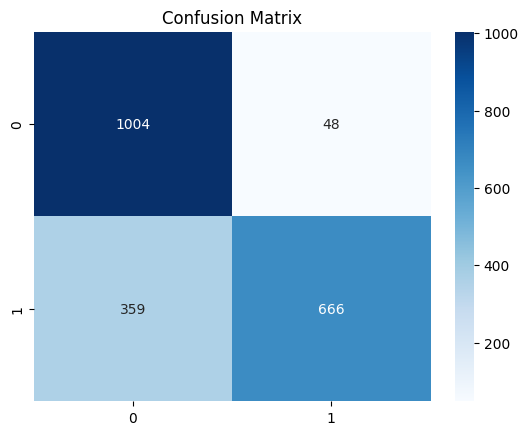

In [140]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

model = lgb.LGBMClassifier(n_estimators=100, learning_rate=0.05)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

#Evaluating Other Models

In [141]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score
import seaborn as sns
import matplotlib.pyplot as plt

In [142]:
# Scale data for Logistic Regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Training Random Forest
Accuracy: 0.8079
              precision    recall  f1-score   support

           0       0.74      0.95      0.83      1052
           1       0.93      0.66      0.77      1025

    accuracy                           0.81      2077
   macro avg       0.84      0.81      0.80      2077
weighted avg       0.84      0.81      0.80      2077



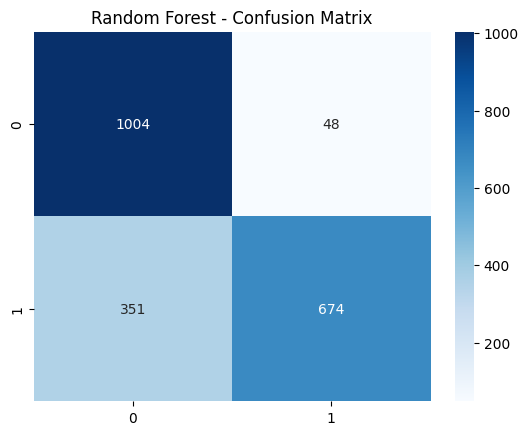


Training XGBoost


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning:

[22:43:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




Accuracy: 0.8084
              precision    recall  f1-score   support

           0       0.74      0.95      0.83      1052
           1       0.93      0.66      0.77      1025

    accuracy                           0.81      2077
   macro avg       0.84      0.81      0.80      2077
weighted avg       0.83      0.81      0.80      2077



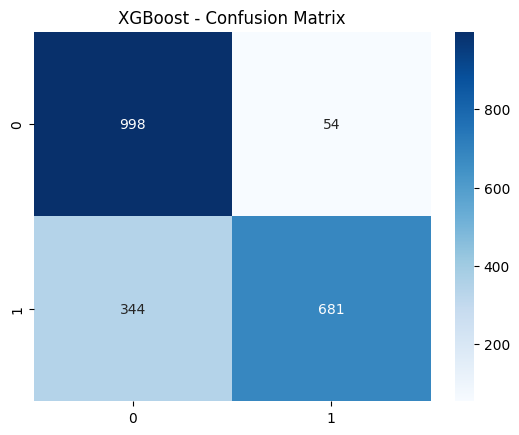


Training Logistic Regression
Accuracy: 0.8223
              precision    recall  f1-score   support

           0       0.78      0.90      0.84      1052
           1       0.88      0.74      0.80      1025

    accuracy                           0.82      2077
   macro avg       0.83      0.82      0.82      2077
weighted avg       0.83      0.82      0.82      2077



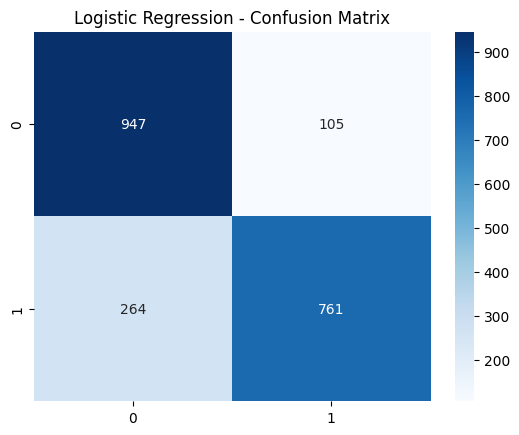


Training LightGBM
[LightGBM] [Info] Number of positive: 4130, number of negative: 4174
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.035554 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7159
[LightGBM] [Info] Number of data points in the train set: 8304, number of used features: 36
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.497351 -> initscore=-0.010597
[LightGBM] [Info] Start training from score -0.010597
Accuracy: 0.8040
              precision    recall  f1-score   support

           0       0.74      0.95      0.83      1052
           1       0.93      0.65      0.77      1025

    accuracy                           0.80      2077
   macro avg       0.83      0.80      0.80      2077
weighted avg       0.83      0.80      0.80      2077



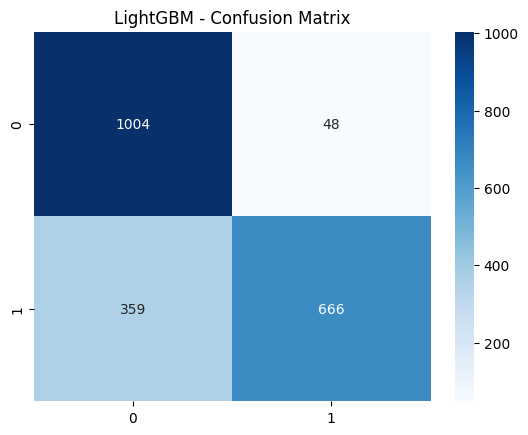


Training Voting (all)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning:

[22:44:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




Accuracy: 0.8214
              precision    recall  f1-score   support

           0       0.76      0.95      0.84      1052
           1       0.93      0.69      0.79      1025

    accuracy                           0.82      2077
   macro avg       0.84      0.82      0.82      2077
weighted avg       0.84      0.82      0.82      2077



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



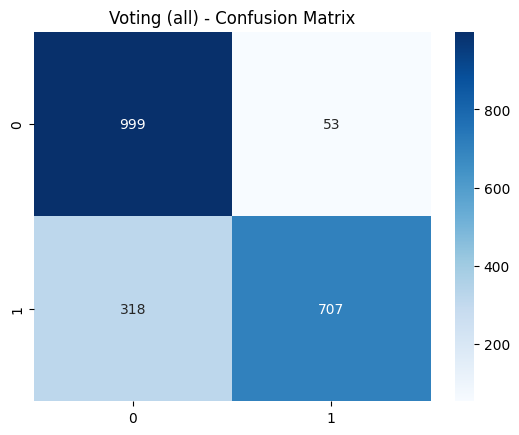

In [143]:
# Step 2: Train Multiple Models
# -----------------------------
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'XGBoost': XGBClassifier(n_estimators=100, learning_rate=0.05, use_label_encoder=False, eval_metric='logloss'),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'LightGBM': lgb.LGBMClassifier(n_estimators=100, learning_rate=0.05),
    'Voting (all)': VotingClassifier(estimators=[
        ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
        ('xgb', XGBClassifier(n_estimators=100, learning_rate=0.05, use_label_encoder=False, eval_metric='logloss')),
        ('lr', LogisticRegression(max_iter=1000)),
    ], voting='hard')
}

for name, model in models.items():
    print(f"\nTraining {name}")
    if name == 'Logistic Regression':
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(classification_report(y_test, y_pred))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.title(f"{name} - Confusion Matrix")
    plt.show()

# The Best Model Is Logistic Regression

In [144]:
model=LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

In [145]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

print("Best hyperparameters:", grid_search.best_params_)


Best hyperparameters: {'C': 100}


In [146]:
model=LogisticRegression(max_iter=1000,C =100)
model.fit(X_train_scaled, y_train)

LogisticRegression(C=100, max_iter=1000)

In [147]:
X_scaled = scaler.fit_transform(X)

In [148]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X_scaled, y, cv=5)
print("Cross-validation scores:", cv_scores)

Cross-validation scores: [0.51275879 0.80732177 0.84874759 0.85115607 0.8265896 ]


In [149]:
predictions = model.predict(X_test_scaled)

In [150]:
predictions[:5]

array([0, 0, 1, 0, 0])

In [151]:
# Create target
df['TARGET'] = (df['Close'].shift(-1) > df['Close']).astype(int)
df.dropna(inplace=True)

# Select features
feature_names = [
    'Open', 'High', 'Low', 'Close', 'HL', 'OC', 'BODY', 'RSI', 'EMA_12', 'EMA_26',
    'MACD', 'BB_HIGH', 'BB_LOW', 'STOCH', 'CLOSE_ROLL_MEAN_3', 'CLOSE_ROLL_STD_3',
    'HL_ROLL_MEAN_3', 'OC_ROLL_MEAN_3', 'CLOSE_ROLL_MEAN_5', 'CLOSE_ROLL_STD_5',
    'HL_ROLL_MEAN_5', 'OC_ROLL_MEAN_5', 'CLOSE_ROLL_MEAN_10', 'CLOSE_ROLL_STD_10',
    'HL_ROLL_MEAN_10', 'OC_ROLL_MEAN_10', 'HOUR', 'DAY_OF_WEEK', 'IS_BULLISH',
    'IS_BEARISH', 'IS_DOJI', 'IS_HAMMER', 'IS_INV_HAMMER', 'PREV_OPEN',
    'PREV_CLOSE', 'BULLISH_ENGULFING', 'BEARISH_ENGULFING'
]

X = df[feature_names]
y = df['TARGET']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train model
model = LogisticRegression(max_iter=1000, C=100)
model.fit(X_train, y_train)

LogisticRegression(C=100, max_iter=1000)

---> This Predict Candles Direction Up Or Down

#Model Deployment

In [152]:
!pip install streamlit pyngrok joblib

In [153]:
# Save model & scaler
with open("logistic_regression_model.pkl", "wb") as f:
    pickle.dump(model, f)

with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

print("Model and scaler saved!")

Model and scaler saved!


In [154]:
%%writefile streamlit_app.py
import streamlit as st
import numpy as np
import pickle

# Load model
with open('logistic_regression_model.pkl', 'rb') as file:
    model = pickle.load(file)

st.title("Forex Movement Prediction (Logistic Regression)")

features = [
    'Open', 'High', 'Low', 'Close', 'HL', 'OC', 'BODY', 'RSI',
    'EMA_12', 'EMA_26', 'MACD', 'BB_HIGH', 'BB_LOW', 'STOCH',
    'CLOSE_ROLL_MEAN_3', 'CLOSE_ROLL_STD_3', 'HL_ROLL_MEAN_3', 'OC_ROLL_MEAN_3',
    'CLOSE_ROLL_MEAN_5', 'CLOSE_ROLL_STD_5', 'HL_ROLL_MEAN_5', 'OC_ROLL_MEAN_5',
    'CLOSE_ROLL_MEAN_10', 'CLOSE_ROLL_STD_10', 'HL_ROLL_MEAN_10', 'OC_ROLL_MEAN_10',
    'HOUR', 'DAY_OF_WEEK', 'IS_BULLISH', 'IS_BEARISH', 'IS_DOJI',
    'IS_HAMMER', 'IS_INV_HAMMER', 'PREV_OPEN', 'PREV_CLOSE',
    'BULLISH_ENGULFING', 'BEARISH_ENGULFING'
]

user_input = []
for feature in features:
    value = st.number_input(f"{feature}", value=0.0)
    user_input.append(value)

if st.button("Predict"):
    input_array = np.array(user_input).reshape(1, -1)
    prediction = model.predict(input_array)[0]
    st.success(f"📈 Predicted Movement: {'UP' if prediction == 1 else 'DOWN'}")


Overwriting streamlit_app.py


In [155]:
from google.colab import files
files.upload()  # Upload the model file here

{}

In [156]:
!ngrok config add-authtoken 2vxwvf2Iffxoxn3jRlT1i1ATQMV_2MrsQGhiMnNECHz8rfePK

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [157]:
import threading
import time
from pyngrok import ngrok

# Start Streamlit app in background
def run():
    !streamlit run streamlit_app.py

thread = threading.Thread(target=run)
thread.start()

# Wait a few seconds for Streamlit to boot up
time.sleep(5)

# Connect to the running app via ngrok
public_url = ngrok.connect(addr='8501', proto='http', bind_tls=True)
print(f"🔗 Your Streamlit app is live at: {public_url}")





  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8503
  Network URL: http://172.28.0.12:8503
  External URL: http://34.168.59.125:8503

🔗 Your Streamlit app is live at: NgrokTunnel: "https://f0d6-34-168-59-125.ngrok-free.app" -> "http://localhost:8501"
